# Escenarios

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

# Importo librerias
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

# Importo base de datos
tabla_df = pd.read_csv('/content/drive/MyDrive/Hackaton/clean-data/reg_tabla.csv', index_col=0)
df_f = tabla_df.copy()
#df = df.drop(columns = ['sexo', 'tiene_cable']) #Saco la columna de sexo porque demostramos que no es una variable que nos importe.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Y = df_f.nivel_desemp_matematica
X = df_f.drop(['nivel_desemp_matematica'],axis=1)
# Separo datos para el train y el test. 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 5) 

In [ ]:
# Escalo todos los datos

escalar = StandardScaler()
#X_train.loc[:,['indice_socioeconomico_medio']] = escalar.fit_transform(X_train.loc[:,['indice_socioeconomico_medio']])
#X_test.loc[:,['indice_socioeconomico_medio']] = escalar.transform(X_test.loc[:,['indice_socioeconomico_medio']])

# Modelo
algoritmo = LogisticRegression().fit(X_train, Y_train)
Y_pred = algoritmo.predict(X_test)
precision = precision_score(Y_test, Y_pred)
precision

0.5772927657729277

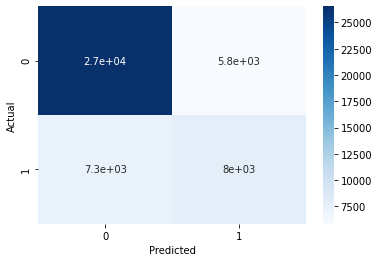

Accuracy:  0.724064866679254


In [ ]:
# GRAPHS
algoritmo.score(X_test, Y_test)
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
import seaborn as sn
from sklearn import metrics
sn.heatmap(confusion_matrix, annot=True,cmap = plt.cm.Blues)
plt.show()
print('Accuracy: ',metrics.accuracy_score(Y_test, Y_pred))

## Logistica

In [ ]:
df_f = df # Tomo solamente las filas que no tienen NaN 

# Creo los vectores del input y del output
Y = df_f.nivel_desemp_matematica
X = df_f.drop(['nivel_desemp_matematica'],axis=1)
algoritmo = LogisticRegression().fit(X, Y) #entreno 100%

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f63d452ea20>],
      dtype=object)

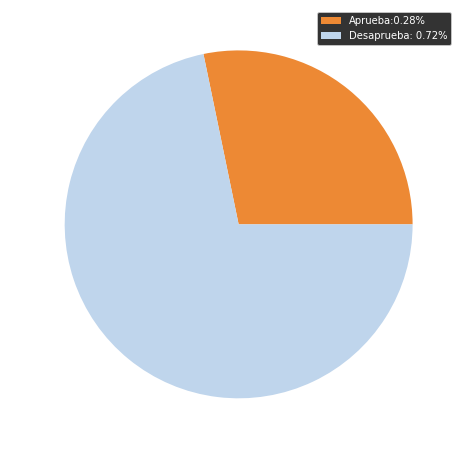

In [ ]:
# Prueba modelo
X_prueba = pd.read_csv('/content/drive/MyDrive/Hackaton/clean-data/mock_tabla.csv', index_col=0) 
Y_prueba = algoritmo.predict(X_prueba)
aprueba = (Y_prueba == 1).sum()
desaprueba = (Y_prueba == 0).sum()

import pandas as pd
df_plt = pd.DataFrame([aprueba,desaprueba], index=['Aprueba:' + str(round(aprueba/(aprueba+desaprueba),2)) + '%' ,'Desaprueba: ' + str(round(desaprueba/(aprueba+desaprueba),2)) + '%'])
df_plt.plot(kind='pie', subplots=True, figsize=(8, 8), colors = ['#ED8934','#BFD5EC'])

## Red neuronal

In [ ]:
import numpy as np
import pandas as pd
from random import randint
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
df_f = df # Tomo solamente las filas que no tienen NaN 
# Creo los vectores del input y del output
Y = np.array(df_f.nivel_desemp_matematica)
X = np.array(df_f.drop(['nivel_desemp_matematica'],axis=1))
scaler = MinMaxScaler()
X = scaler.fit_transform((X).reshape(-1,7)) #(-1, número de columnas de X)

In [ ]:
import keras 
from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [ ]:
model = Sequential([
                    Dense(64, activation= 'sigmoid', input_shape = (7,)),
                    Dense(2, activation='relu')
]) # Creo las capas.

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(lr=0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])#sparse_categorical_crossentropy

In [ ]:
model.fit(X, Y, batch_size = 100, epochs = 20, shuffle = True, verbose = 2) #, validation_split = 0.2

Epoch 1/20
2384/2384 - 3s - loss: 0.7200 - accuracy: 0.6765
Epoch 2/20
2384/2384 - 2s - loss: 0.6931 - accuracy: 0.6765
Epoch 3/20
2384/2384 - 2s - loss: 0.6931 - accuracy: 0.6765
Epoch 4/20
2384/2384 - 2s - loss: 0.6931 - accuracy: 0.6765
Epoch 5/20
2384/2384 - 2s - loss: 0.6931 - accuracy: 0.6765
Epoch 6/20
2384/2384 - 2s - loss: 0.6931 - accuracy: 0.6765
Epoch 7/20
2384/2384 - 2s - loss: 0.6931 - accuracy: 0.6765
Epoch 8/20
2384/2384 - 2s - loss: 0.6931 - accuracy: 0.6765
Epoch 9/20
2384/2384 - 2s - loss: 0.6931 - accuracy: 0.6765
Epoch 10/20
2384/2384 - 2s - loss: 0.6931 - accuracy: 0.6765
Epoch 11/20
2384/2384 - 2s - loss: 0.6931 - accuracy: 0.6765
Epoch 12/20
2384/2384 - 2s - loss: 0.6931 - accuracy: 0.6765
Epoch 13/20
2384/2384 - 2s - loss: 0.6931 - accuracy: 0.6765
Epoch 14/20
2384/2384 - 2s - loss: 0.6931 - accuracy: 0.6765
Epoch 15/20
2384/2384 - 2s - loss: 0.6931 - accuracy: 0.6765
Epoch 16/20
2384/2384 - 2s - loss: 0.6931 - accuracy: 0.6765
Epoch 17/20
2384/2384 - 2s - loss

In [ ]:
scaler = MinMaxScaler()
scaled_X_test = scaler.fit_transform((X_test).reshape(-1,7))
predictions = model.predict(scaled_X_test.reshape(-1,7), batch_size = 1000, verbose = 0) # Da la probabilidad de 0 y 1. 
rounded_predictions = model.predict_classes(scaled_X_test.reshape(-1,7), batch_size = 1000, verbose = 0)
rounded_predictions

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 0, 0, ..., 0, 0, 0])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,tiene_smartphone,ise_high,ise_low,ise_mid,ise_cat_high,ise_cat_low,ise_cat_mid
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
999995,0.0,0.0,0.0,1.0,0.0,0.0,1.0
999996,0.0,0.0,0.0,1.0,0.0,0.0,1.0
999997,1.0,0.0,0.0,1.0,1.0,0.0,0.0
999998,0.0,0.0,1.0,0.0,1.0,0.0,0.0


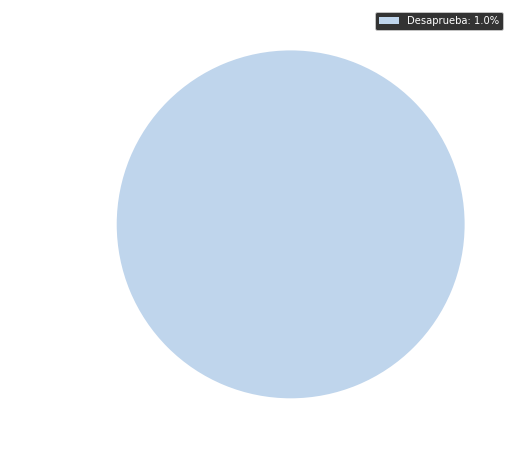

In [ ]:
# Prueba modelo
X_prueba = pd.read_csv('/content/drive/MyDrive/Hackaton/clean-data/mock_tabla.csv', index_col=0) 
X_prueba = np.array(X_prueba)


#Y_prueba = model.predict(X_prueba.reshape(-1,7), batch_size = 1000, verbose = 0) # Da la probabilidad de 0 y 1. 
Y_prueba = model.predict_classes(X_prueba.reshape(-1,7), batch_size = 1000, verbose = 0)


aprueba = (Y_prueba == 1).sum()
desaprueba = (Y_prueba == 0).sum()

import pandas as pd
df_plt = pd.DataFrame([aprueba,desaprueba], index=['Aprueba:' + str(round(aprueba/(aprueba+desaprueba),2)) + '%' ,'Desaprueba: ' + str(round(desaprueba/(aprueba+desaprueba),2)) + '%'])
df_plt.plot(kind='pie', subplots=True, figsize=(8, 8), colors = ['#ED8934','#BFD5EC'])


In [ ]:
%matplotlib inline 
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
cm = confusion_matrix(Y_test, rounded_predictions)

In [ ]:
def plot_confusion_matrix(cm, classes, 
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
  plt.imshow(cm,interpolation = 'nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('floar')/cm.sum(axis = 1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else: 
    print(cm)
  
  thresh = cm.max()/2. 
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,cm[i,j],
             horizontalalignment = 'center',
             color = 'white' if cm[i,j]> thresh else 'black')
    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicho')

[[25251  6883]
 [ 6641  8892]]


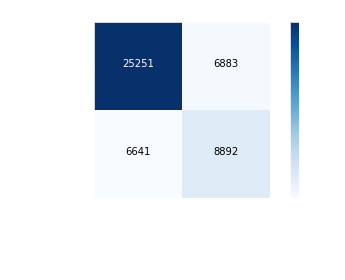

In [ ]:
cm_plot_labels = ['Desaprobado', 'Aprobado']
plot_confusion_matrix(cm, cm_plot_labels, title = 'Confusion Matrix')